# DC CRIME

### find crime data and analyze

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
import pysal

import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (10.0, 10.0)

# widget stuff
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

# progress stuff
from tqdm import tqdm_notebook, tqdm_pandas

# turn warnings off
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./dc_crime_add_vars.csv')


# Building Permits

In [3]:
housing_15 = pd.read_csv('./Building_Permits_in_2015.csv')
housing_16 = pd.read_csv('./Building_Permits_in_2016.csv')
housing_17 = pd.read_csv('./Building_Permits_in_2016.csv')

/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [272]:
housing_15.head(1)

,���X,Y,OBJECTID,DCRAINTERNALNUMBER,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,PERMIT_CATEGORY_NAME,APPLICATION_STATUS_NAME,FULL_ADDRESS,DESC_OF_WORK,SSL,ZONING,PERMIT_APPLICANT,FEE_TYPE,FEES_PAID,OWNER_NAME,LASTMODIFIEDDATE,CITY,STATE,LATITUDE,LONGITUDE,XCOORD,YCOORD,ZIPCODE,MARADDRESSREPOSITORYID,DCSTATADDRESSKEY,DCSTATLOCATIONKEY,WARD,ANC,SMD,DISTRICT,PSA,NEIGHBORHOODCLUSTER,HOTSPOT2006NAME,HOTSPOT2005NAME,HOTSPOT2004NAME,BUSINESSIMPROVEMENTDISTRICT
0,-77.004162,38.905885,22424,111511422,2015-09-17T00:00:00.000Z,B1511422,CONSTRUCTION,ALTERATION AND REPAIR,NaN,PERMIT ISSUED,"150 M ST NE, WASHINGTON, DC 20002",NEW OCCUPANCY LOAD ON A TEMPORARY C OF O. CUR...,0711 0818,NaN,CHRISTOPHER LYNCH,20.00 (AAREFEE);200.00 (ALTREPAIR),0.0,"THE FLATS 140, LLC",2017-01-01T08:20:48.000Z,WASHINGTON,DC,38.905877,-77.00416,399639.21,137557.69,20002.0,303699,417878,0,6.0,6C,6C04,FIFTH,506,25,NONE,NONE,NONE,NOMA BID


In [4]:
housing_15.PERMIT_SUBTYPE_NAME.unique()

array(['ALTERATION AND REPAIR', 'ADDITION ALTERATION REPAIR', 'RAZE',
       'MISCELLANEOUS', 'RETAINING WALL', 'CIVIL PLANS', 'TENANT LAYOUT',
       'SIGN', 'SWIMMING POOL', 'SHED', 'SHEETING AND SHORING',
       'NEW BUILDING', 'PROJECTION', 'GARAGE', 'FOUNDATION ONLY',
       'DEMOLITION', 'FENCE', 'CAPACITY PLACARD', 'PLUMBING', 'MECHANICAL',
       'ADDITION', 'GAS FITTING', 'ELECTRICAL - HEAVY UP',
       'ELECTRICAL - GENERAL', 'BUILDING', 'SPECIAL SIGN', 'SOLAR SYSTEM',
       'AWNING', 'EXCAVATION ONLY', 'EXPEDITED', nan, 'ELEVATOR - REPAIR',
       'ELEVATOR - NEW', 'PLUMBING AND GAS', 'BOILER', 'ELECTRICAL'], dtype=object)

In [5]:
housing_15 = housing_15[['ISSUE_DATE', 'WARD', 'PERMIT_SUBTYPE_NAME']]
housing_16 = housing_16[['ISSUE_DATE', 'WARD', 'PERMIT_SUBTYPE_NAME']]
housing_17 = housing_17[['ISSUE_DATE', 'WARD', 'PERMIT_SUBTYPE_NAME']]

In [408]:
housing_15.head()

,ISSUE_DATE,WARD,PERMIT_SUBTYPE_NAME
0,2015-09-17T00:00:00.000Z,6.0,ALTERATION AND REPAIR
1,2015-07-09T00:00:00.000Z,6.0,ALTERATION AND REPAIR
2,2015-06-09T00:00:00.000Z,6.0,ALTERATION AND REPAIR
3,2015-09-17T00:00:00.000Z,6.0,ALTERATION AND REPAIR
4,2015-07-09T00:00:00.000Z,6.0,ALTERATION AND REPAIR


In [6]:
housing_15.index = housing_15.ISSUE_DATE
housing_15.drop('ISSUE_DATE', axis=1, inplace=True)
housing_15.index = pd.to_datetime(housing_15.index)
housing_15.index = housing_15.index.date
housing_15.index = pd.to_datetime(housing_15.index)


0        2015-09-17 00:00:00
1        2015-07-09 00:00:00
2        2015-06-09 00:00:00
3        2015-09-17 00:00:00
4        2015-07-09 00:00:00
5        2015-06-09 00:00:00
6        2015-09-17 00:00:00
7        2015-07-09 00:00:00
8        2015-06-09 00:00:00
9        2015-09-17 00:00:00
10       2015-07-09 00:00:00
11       2015-06-09 00:00:00
12       2015-09-17 00:00:00
13       2015-07-09 00:00:00
14       2015-06-09 00:00:00
15       2015-09-17 00:00:00
16       2015-07-09 00:00:00
17       2015-06-09 00:00:00
18       2015-09-17 00:00:00
19       2015-07-09 00:00:00
20       2015-06-09 00:00:00
21       2015-09-17 00:00:00
22       2015-07-09 00:00:00
23       2015-06-09 00:00:00
24       2015-09-17 00:00:00
25       2015-07-09 00:00:00
26       2015-06-09 00:00:00
27       2015-09-17 00:00:00
28       2015-07-09 00:00:00
29       2015-06-09 00:00:00
30       2015-09-17 00:00:00
31       2015-07-09 00:00:00
32       2015-06-09 00:00:00
33       2015-09-17 00:00:00
34       2015-

In [7]:
housing_16.index = housing_16.ISSUE_DATE
housing_16.drop('ISSUE_DATE', axis=1, inplace=True)
housing_16.index = pd.to_datetime(housing_16.index)
housing_16.index = housing_16.index.date
housing_16.index = pd.to_datetime(housing_16.index)
#housing_16.ISSUE_DATE = pd.to_datetime(housing_16.ISSUE_DATE)

In [8]:
housing_17.index = housing_17.ISSUE_DATE
housing_17.drop('ISSUE_DATE', axis=1, inplace=True)
housing_17.index = pd.to_datetime(housing_17.index)
housing_17.index = housing_17.index.date
housing_17.index = pd.to_datetime(housing_17.index)


In [9]:
data_2 = housing_15.append(housing_16)

In [10]:
all_housing = data_2.append(housing_17)

In [11]:
all_housing.head()

,WARD,PERMIT_SUBTYPE_NAME
2015-09-17,6.0,ALTERATION AND REPAIR
2015-07-09,6.0,ALTERATION AND REPAIR
2015-06-09,6.0,ALTERATION AND REPAIR
2015-09-17,6.0,ALTERATION AND REPAIR
2015-07-09,6.0,ALTERATION AND REPAIR


In [284]:
all_housing['building_permits']=1

In [285]:
dummies_housing = pd.get_dummies(all_housing['PERMIT_SUBTYPE_NAME'])

In [286]:
dummies_housing.head()

,ADDITION,ADDITION ALTERATION REPAIR,ALTERATION AND REPAIR,AWNING,BOILER,BUILDING,CAPACITY PLACARD,CIVIL PLANS,DEMOLITION,ELECTRICAL,ELECTRICAL - GENERAL,ELECTRICAL - HEAVY UP,ELEVATOR - NEW,ELEVATOR - REPAIR,EXCAVATION ONLY,EXPEDITED,FENCE,FOUNDATION ONLY,GARAGE,GAS FITTING,MECHANICAL,MISCELLANEOUS,NEW BUILDING,PLUMBING,PLUMBING AND GAS,PROJECTION,RAZE,RETAINING WALL,SHED,SHEETING AND SHORING,SIGN,SOLAR SYSTEM,SPECIAL SIGN,SWIMMING POOL,TENANT LAYOUT
2015-09-17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-07-09,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-06-09,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-09-17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2015-07-09,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [287]:
all_housing = pd.concat([all_housing, dummies_housing], axis=1)

In [288]:
test3 = all_housing.groupby([pd.TimeGrouper('W'), 'WARD']).sum()

In [289]:
test3.head(20)

ADDITION  ADDITION ALTERATION REPAIR  ALTERATION AND REPAIR  \
           WARD                                                                
2015-01-04 1.0        0.0                         0.0                    1.0   
           2.0        0.0                         0.0                    6.0   
           3.0        0.0                         0.0                    1.0   
           4.0        0.0                         0.0                    3.0   
           5.0        0.0                         1.0                    4.0   
           6.0        0.0                         0.0                    7.0   
           7.0        1.0                         0.0                    5.0   
           8.0        0.0                         0.0                    1.0   
2015-01-11 1.0        0.0                       134.0                    9.0   
           2.0        1.0                         0.0                   39.0   
           3.0        0.0                         0.0                   13.0   
           4.0        0.0                         5.0                   12.0   
           5.0        0.0                         2.0                   21.0   
           6.0        2.0                         1.0                   32.0   
           7.0        0.0                         2.0                   10.0   
           8.0        0.0                         1.0                    9.0   
2015-01-18 1.0        0.0                         4.0                   14.0   
           2.0        0.0                         1.0                   54.0   
           3.0        0.0                         4.0                   10.0   
           4.0        1.0                         4.0                   10.0   

                 AWNING  BOILER  BUILDING  CAPACITY PLACARD  CIVIL PLANS  \
           WARD                                                            
2015-01-04 1.0      0.0     0.0       0.0               0.0          0.0   
           2.0      0.0     0.0       0.0               0.0          0.0   
           3.0      0.0     0.0       0.0               0.0          0.0   
           4.0      0.0     0.0       1.0               0.0          0.0   
           5.0      0.0     0.0       2.0               0.0          0.0   
           6.0      0.0     0.0       1.0               0.0          0.0   
           7.0      0.0     0.0       1.0               0.0          0.0   
           8.0      0.0     0.0       0.0               0.0          0.0   
2015-01-11 1.0      0.0     0.0       6.0               0.0          0.0   
           2.0      1.0     0.0       3.0               0.0          0.0   
           3.0      0.0     0.0       4.0               0.0          1.0   
           4.0      0.0     1.0       8.0               0.0          0.0   
           5.0      0.0     1.0       4.0               0.0          1.0   
           6.0      0.0     0.0      10.0               0.0          0.0   
           7.0      0.0     0.0       1.0               0.0          0.0   
           8.0      0.0     0.0       1.0               0.0          0.0   
2015-01-18 1.0      0.0     0.0       6.0               0.0          0.0   
           2.0      0.0     1.0       0.0               0.0          0.0   
           3.0      0.0     0.0       4.0               0.0          1.0   
           4.0      1.0     0.0       7.0               0.0          0.0   

                 DEMOLITION  ELECTRICAL  ELECTRICAL - GENERAL  \
           WARD                                                 
2015-01-04 1.0          0.0         0.0                   0.0   
           2.0          1.0         4.0                   0.0   
           3.0          0.0         3.0                   0.0   
           4.0          0.0         3.0                   0.0   
           5.0          0.0         1.0                   0.0   
           6.0          0.0         3.0                   0.0   
           7.0          0.0         1.0                   0.0  

In [103]:
# gg = all_housing['Total'].resample('1D').sum()
# days = all_housing.resample('1D').last()

In [104]:
# days.drop('Total', axis=1, inplace=True)
# gg = pd.DataFrame(gg)

In [106]:
# all_days= days.merge(gg, left_index = True, right_index = True)

# Crime Data

In [17]:
data = data.drop('Unnamed: 0', axis=1)

In [18]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [19]:
def eda(dataframe): #Ritkas code chunk to check quality of data
    print "missing values \n", dataframe.isnull().sum() #shows total amount of null values for each column
    print "dataframe types \n", dataframe.dtypes
    print "dataframe shape \n", dataframe.shape     
    print "dataframe describe \n", dataframe.describe()
    print "dataframe length =", len(dataframe) #length of the dataframe
    print "duplicates", dataframe.duplicated().sum() # added this to duplicates in the data
    for item in dataframe:
        print item
        print dataframe[item].nunique()

In [20]:
data = data.drop('X', axis=1)

In [21]:
data.OFFENSE.unique()

array(['ROBBERY', 'MOTOR VEHICLE THEFT', 'BURGLARY', 'THEFT/OTHER',
       'HOMICIDE', 'ASSAULT W/DANGEROUS WEAPON', 'SEX ABUSE',
       'THEFT F/AUTO', 'ARSON'], dtype=object)

In [46]:
eda(data)

missing values 
REPORT_DAT                  0
SHIFT                       0
OFFENSE                     0
METHOD                      0
BLOCK                       0
DISTRICT                  197
PSA                       245
WARD                        0
ANC                         0
NEIGHBORHOOD_CLUSTER     4453
BLOCK_GROUP              1038
CENSUS_TRACT             1038
VOTING_PRECINCT            84
CCN                         0
START_DATE                 14
END_DATE                10766
XBLOCK                      0
YBLOCK                      0
optional                    0
date                        0
year                        0
month                       0
day                         0
hour                        0
minute                      0
second                      0
EW                          0
NS                          0
quad                        0
crimetype                   0
dtype: int64
dataframe types 
REPORT_DAT               object
SHIFT                 

In [321]:
data.head(1
         )

,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,CCN,START_DATE,END_DATE,XBLOCK,YBLOCK,optional,date,year,month,day,hour,minute,second,EW,NS,quad,crimetype
0,2008-05-08 15:59:59,EVENING,ROBBERY,OTHERS,Q STREET SE AND 17TH STREET SE,6.0,607.0,8,8A,Cluster 34,007601 4,7601.0,Precinct 140,8061902,2008-05-08 15:00:00,2008-05-08 15:01:00,-76.980777,38.870742,True,2008-05-08 15:59:59,2008,5,8,15,59,59,East,South,Southeast,Violent


In [22]:
data_new = data.drop(['date', 'year', 'month', 'day', 'hour', 'minute', 'second', 'EW', 'NS', 'PSA', 'CCN','VOTING_PRECINCT','START_DATE','END_DATE', 'optional'], axis=1)

In [23]:
data_new.drop_duplicates(inplace = True)

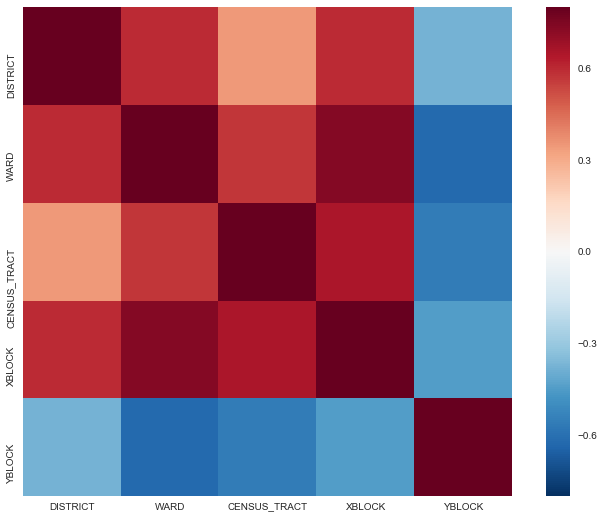

In [24]:
corrmat = data_new.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [136]:
data_new.SHIFT.count()

319647

In [52]:
data_new.head(1)

,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,XBLOCK,YBLOCK,quad,crimetype
0,2008-05-08 15:59:59,EVENING,ROBBERY,OTHERS,Q STREET SE AND 17TH STREET SE,6.0,8,8A,Cluster 34,007601 4,7601.0,-76.980777,38.870742,Southeast,Violent


ValueError: x and y must be the same size

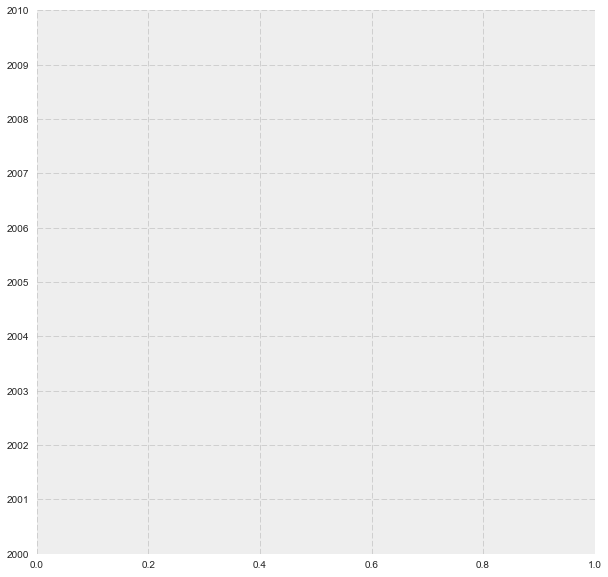

In [139]:
plt.scatter(data_new.SHIFT.count(), data_new.index, c=data_new.WARD)
plt.show() #this just ensures that my plots will show up

In [124]:
#data_new[['XBLOCK','YBLOCK']].plot()

In [25]:
import datetime

In [26]:
data_new['REPORT_DAT'] = pd.to_datetime(data_new['REPORT_DAT'])
# resetting date back to the index
data_new.set_index('REPORT_DAT',inplace = True)

In [27]:
data_new.head(1)

,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,XBLOCK,YBLOCK,quad,crimetype
REPORT_DAT,,,,,,,,,,,,,,
2008-05-08 15:59:59,EVENING,ROBBERY,OTHERS,Q STREET SE AND 17TH STREET SE,6.0,8,8A,Cluster 34,007601 4,7601.0,-76.980777,38.870742,Southeast,Violent


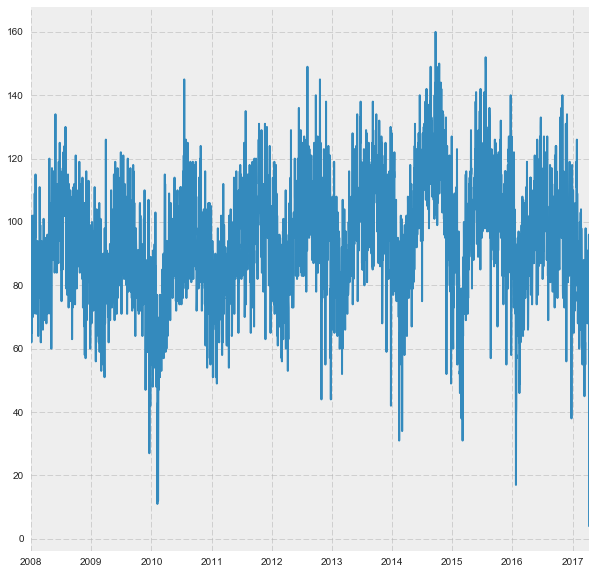

In [126]:
data_new.index.value_counts().sort_index().plot()

In [28]:
data_new[data_new.index.year == 2016].count()

SHIFT                   35059
OFFENSE                 35059
METHOD                  35059
BLOCK                   35059
DISTRICT                35043
WARD                    35059
ANC                     35059
NEIGHBORHOOD_CLUSTER    34653
BLOCK_GROUP             34992
CENSUS_TRACT            34992
XBLOCK                  35059
YBLOCK                  35059
quad                    35059
crimetype               35059
dtype: int64

In [29]:
violent = data_new[data_new['crimetype'] == 'Violent']

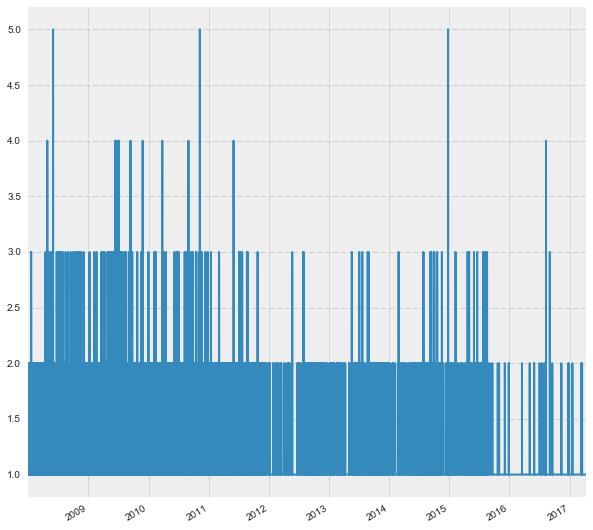

In [275]:
violent.index.value_counts().sort_index().plot()

In [30]:
violent[violent.index.year == 2016].count()

SHIFT                   5720
OFFENSE                 5720
METHOD                  5720
BLOCK                   5720
DISTRICT                5720
WARD                    5720
ANC                     5720
NEIGHBORHOOD_CLUSTER    5653
BLOCK_GROUP             5697
CENSUS_TRACT            5697
XBLOCK                  5720
YBLOCK                  5720
quad                    5720
crimetype               5720
dtype: int64

In [59]:
violent.BLOCK_GROUP.nunique()

449

In [31]:
#trying with all crimes to see if building permits can affect it
all_crime = data_new

In [60]:
eda(violent)

missing values 
SHIFT                     0
OFFENSE                   0
METHOD                    0
BLOCK                     0
DISTRICT                 29
WARD                      0
ANC                       0
NEIGHBORHOOD_CLUSTER    885
BLOCK_GROUP             348
CENSUS_TRACT            348
XBLOCK                    0
YBLOCK                    0
quad                      0
crimetype                 0
dtype: int64
dataframe types 
SHIFT                    object
OFFENSE                  object
METHOD                   object
BLOCK                    object
DISTRICT                float64
WARD                      int64
ANC                      object
NEIGHBORHOOD_CLUSTER     object
BLOCK_GROUP              object
CENSUS_TRACT            float64
XBLOCK                  float64
YBLOCK                  float64
quad                     object
crimetype                object
dtype: object
dataframe shape 
(59619, 14)
dataframe describe 
           DISTRICT          WARD  CENSUS_TRACT    

In [61]:
violent.OFFENSE.unique()

array(['ROBBERY', 'HOMICIDE', 'ASSAULT W/DANGEROUS WEAPON', 'SEX ABUSE'], dtype=object)

In [32]:
violent.groupby('WARD').OFFENSE.count()

WARD
1     7995
2     5402
3      935
4     5740
5     8420
6     7715
7    10966
8    12446
Name: OFFENSE, dtype: int64

In [63]:
violent.groupby('BLOCK_GROUP').OFFENSE.count().min()

1

In [33]:
violent.sort_values(["BLOCK_GROUP"], inplace = True) #sorts values by Block group
columns = ['DISTRICT', 'NEIGHBORHOOD_CLUSTER', 'BLOCK_GROUP', 'CENSUS_TRACT']
for x in columns:
    violent[x].fillna(method = "ffill", inplace = True)
violent.isnull().sum()

/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


SHIFT                   0
OFFENSE                 0
METHOD                  0
BLOCK                   0
DISTRICT                0
WARD                    0
ANC                     0
NEIGHBORHOOD_CLUSTER    0
BLOCK_GROUP             0
CENSUS_TRACT            0
XBLOCK                  0
YBLOCK                  0
quad                    0
crimetype               0
dtype: int64

In [34]:
a=pd.get_dummies(violent['crimetype'])

In [35]:
#trying all crime
all_crime.drop(['SHIFT', "METHOD", 'DISTRICT', 'ANC', 'NEIGHBORHOOD_CLUSTER','BLOCK_GROUP', 'CENSUS_TRACT', "XBLOCK", 'YBLOCK','quad', 'crimetype', 'BLOCK'], axis=1)

,OFFENSE,WARD
REPORT_DAT,,
2008-05-08 15:59:59,ROBBERY,8
2008-05-08 16:17:00,ROBBERY,8
2008-05-08 17:29:59,MOTOR VEHICLE THEFT,8
2008-05-08 18:06:00,BURGLARY,8
2008-05-08 20:15:00,THEFT/OTHER,8
2008-04-16 09:00:00,MOTOR VEHICLE THEFT,8
2008-03-29 05:25:00,BURGLARY,8
2008-03-29 09:56:59,THEFT/OTHER,8
2008-03-29 11:58:59,MOTOR VEHICLE THEFT,8


In [36]:
#trying all crime
all_crime['crime_committed'] = 1

In [37]:
df = pd.concat([violent, a], axis=1)

In [38]:
df = df.drop(['SHIFT', "METHOD", 'DISTRICT', 'ANC', 'NEIGHBORHOOD_CLUSTER','BLOCK_GROUP', 'CENSUS_TRACT', "XBLOCK", 'YBLOCK','quad', 'crimetype', 'BLOCK'], axis=1)

In [39]:
df.sort_index(inplace = True)

In [40]:
b = pd.get_dummies(df['OFFENSE'])

In [41]:
df = pd.concat([df,b], axis=1)

In [42]:
df.head()

,OFFENSE,WARD,Violent,ASSAULT W/DANGEROUS WEAPON,HOMICIDE,ROBBERY,SEX ABUSE
REPORT_DAT,,,,,,,
2008-01-01 00:58:00,ROBBERY,4,1,0,0,1,0
2008-01-01 02:00:00,ASSAULT W/DANGEROUS WEAPON,4,1,1,0,0,0
2008-01-01 02:50:00,ROBBERY,2,1,0,0,1,0
2008-01-01 02:55:00,ASSAULT W/DANGEROUS WEAPON,2,1,1,0,0,0
2008-01-01 03:00:00,ASSAULT W/DANGEROUS WEAPON,2,1,1,0,0,0


In [203]:
# subset = df[df['BLOCK'].str.contains('-')]

In [72]:
type(df)


pandas.core.frame.DataFrame

In [179]:
# import  re

In [191]:
# def get_dash(block):
#     return re.findall('. = -', block)

In [192]:
# df['BLOCK'].apply(lambda x: get_dash(x))

REPORT_DAT
2008-01-01 00:58:00    []
2008-01-01 02:00:00    []
2008-01-01 02:50:00    []
2008-01-01 02:55:00    []
2008-01-01 03:00:00    []
2008-01-01 03:40:00    []
2008-01-01 03:45:00    []
2008-01-01 03:59:59    []
2008-01-01 04:18:00    []
2008-01-01 05:23:00    []
2008-01-01 05:23:59    []
2008-01-01 05:48:59    []
2008-01-01 06:24:59    []
2008-01-01 06:30:00    []
2008-01-01 07:30:00    []
2008-01-01 09:00:00    []
2008-01-01 12:00:00    []
2008-01-01 12:45:00    []
2008-01-01 13:30:00    []
2008-01-01 17:25:00    []
2008-01-01 17:29:59    []
2008-01-01 18:10:00    []
2008-01-01 18:59:59    []
2008-01-01 20:00:00    []
2008-01-01 20:00:00    []
2008-01-01 21:10:00    []
2008-01-02 00:00:00    []
2008-01-02 03:30:00    []
2008-01-02 06:59:59    []
2008-01-02 09:20:00    []
2008-01-02 09:30:00    []
2008-01-02 10:34:59    []
2008-01-02 14:45:00    []
2008-01-02 15:30:00    []
2008-01-02 16:30:00    []
2008-01-02 18:00:00    []
2008-01-02 18:17:59    []
2008-01-02 19:28:59    []
2

In [45]:
df.index = pd.to_datetime(df.index)
df.index = df.index.date
df.index = pd.to_datetime(df.index)
# resetting date back to the index

In [46]:
#all crime
all_crime.index = all_crime.index.date
all_crime.index = pd.to_datetime(all_crime.index)

In [47]:
df = df.drop('OFFENSE', axis=1)

In [48]:
df.head(1)

,WARD,Violent,ASSAULT W/DANGEROUS WEAPON,HOMICIDE,ROBBERY,SEX ABUSE
2008-01-01,4,1,0,0,1,0


In [49]:
df.index

DatetimeIndex(['2008-01-01', '2008-01-01', '2008-01-01', '2008-01-01',
               '2008-01-01', '2008-01-01', '2008-01-01', '2008-01-01',
               '2008-01-01', '2008-01-01',
               ...
               '2017-04-10', '2017-04-10', '2017-04-10', '2017-04-10',
               '2017-04-10', '2017-04-10', '2017-04-10', '2017-04-10',
               '2017-04-11', '2017-04-11'],
              dtype='datetime64[ns]', length=59619, freq=None)

In [50]:
df.head()

,WARD,Violent,ASSAULT W/DANGEROUS WEAPON,HOMICIDE,ROBBERY,SEX ABUSE
2008-01-01,4,1,0,0,1,0
2008-01-01,4,1,1,0,0,0
2008-01-01,2,1,0,0,1,0
2008-01-01,2,1,1,0,0,0
2008-01-01,2,1,1,0,0,0


### Subset 
not necessary because it auto subsets

In [341]:
st = datetime.datetime(2015, 1, 1, 0, 0)
en = datetime.datetime(2017, 4, 11, 0, 0)

In [342]:
subset_years = data[st:en]

In [92]:
ba = subset_years['Violent'].resample('1D').sum()

In [95]:
ba = pd.DataFrame(ba)

In [199]:
# ba.head()

,Violent
2015-01-01,27.0
2015-01-02,12.0
2015-01-03,9.0
2015-01-04,15.0
2015-01-05,14.0


In [96]:
# by_day = subset_years.resample('1D').last()

In [200]:
# by_day.head()

,WARD,ASSAULT W/DANGEROUS WEAPON,HOMICIDE,ROBBERY,SEX ABUSE,Violent
2015-01-01,1.0,0.0,0.0,1.0,0.0,27.0
2015-01-02,8.0,0.0,0.0,1.0,0.0,12.0
2015-01-03,4.0,0.0,0.0,1.0,0.0,9.0
2015-01-04,6.0,0.0,0.0,1.0,0.0,15.0
2015-01-05,1.0,0.0,0.0,1.0,0.0,14.0


In [101]:
# by_day.drop('Violent', axis=1, inplace=True)


In [108]:
# by_day = by_day.merge(ba, left_index = True, right_index = True)

In [51]:
#all crime
all_crime_grouped = all_crime.groupby([pd.TimeGrouper('W'), 'WARD']).sum()

In [52]:
#all crime
all_crime_grouped.drop(['DISTRICT', 'CENSUS_TRACT','XBLOCK', 'YBLOCK'], axis=1, inplace=True)

In [53]:
test2 = df.groupby([pd.TimeGrouper('W'), 'WARD']).sum()

In [54]:
test2.head(100)

Violent  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  \
           WARD                                                           
2008-01-06 1          14                           3         0       11   
           2          16                           6         0       10   
           3           2                           1         0        1   
           4          14                           4         0       10   
           5          15                           8         1        6   
           6          12                           5         0        7   
           7          12                           5         1        6   
           8          16                          10         0        6   
2008-01-13 1          19                           5         0       14   
           2           9                           1         0        7   
           3           2                           2         0        0   
           4          12                           4         0        8   
           5          17                           8         1        8   
           6          19                           6         0       13   
           7          11                           6         2        3   
           8          24                          12         2        9   
2008-01-20 1          25                           5         0       19   
           2          16                           6         0       10   
           4          16                           3         0       13   
           5          14                           4         0       10   
           6          12                           3         0        9   
           7          26                           9         1       15   
           8          30                          11         1       18   
2008-01-27 1          24                           3         0       21   
           2          14                           5         0        9   
           3           2                           0         0        2   
           4          18                           9         0        9   
           5          23                           9         0       13   
           6          15                           4         0       10   
           7          19                           8         1       10   
           8          27                          10         0       15   
2008-02-03 1          23                           9         0       14   
           2          15                           6         0        9   
           3           1                           1         0        0   
           4          16                           6         1        9   
           5          10                           6         0        4   
           6          17                           7         0       10   
           7          13                           5         0        7   
           8          25                          14         0       11   
2008-02-10 1          18                           7         0       11   
           2          17                           8         0        9   
           3           2                           0         0        2   
           4          17                           5         0       11   
           5          10                           3         0        7   
           6          20                           5         0       13   
           7          22                           9         1       12   
           8          20                           9         1       10   
2008-02-17 1          16                           3         0       13   
           2           4                           1         0        2   
           3           1                           0         0        1   
           4          21                          10         0       11   
           5          15                  

In [55]:
#all crime
all_crime_with_permits = all_crime_grouped.merge(test3, left_index = True, right_index = True)
all_crime_with_permits.head()

In [57]:
all_crime_with_permits.rename(columns={"GAS FITTING": "GAS_FITTING"}, inplace=True)

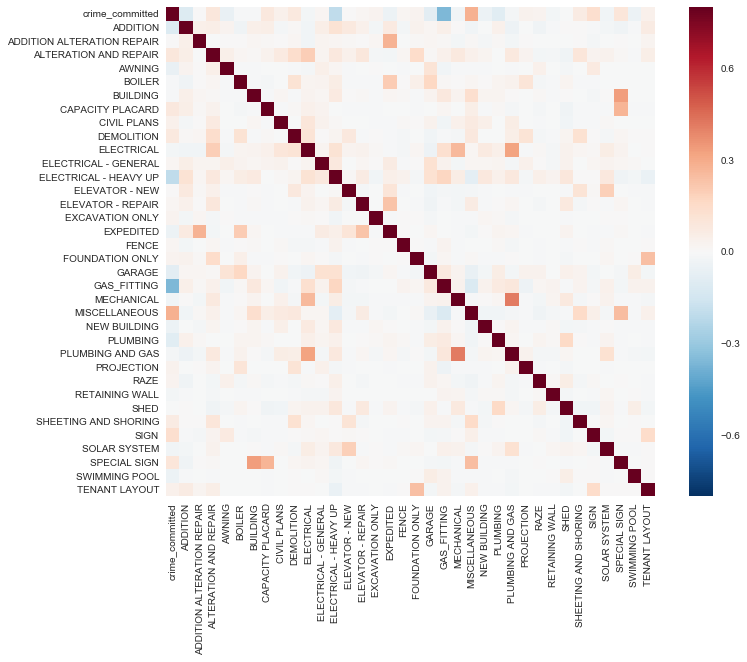

In [58]:
#all data correlation map
corrmat = all_crime_with_permits.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [305]:
final_data = test2.merge(test3, left_index = True, right_index = True)

In [60]:
type(final_data)

pandas.core.frame.DataFrame

In [62]:
final_data.head()

Violent  ASSAULT W/DANGEROUS WEAPON  HOMICIDE  ROBBERY  \
           WARD                                                           
2015-01-04 1.0         9                           1         0        7   
           2.0         4                           1         0        2   
           3.0         2                           1         0        0   
           4.0        11                           3         0        7   
           5.0        13                           6         0        7   

                 SEX ABUSE  ADDITION  ADDITION ALTERATION REPAIR  \
           WARD                                                    
2015-01-04 1.0           1       0.0                         0.0   
           2.0           1       0.0                         0.0   
           3.0           1       0.0                         0.0   
           4.0           1       0.0                         0.0   
           5.0           0       0.0                         1.0   

                 ALTERATION AND REPAIR  AWNING  BOILER  BUILDING  \
           WARD                                                    
2015-01-04 1.0                     1.0     0.0     0.0       0.0   
           2.0                     6.0     0.0     0.0       0.0   
           3.0                     1.0     0.0     0.0       0.0   
           4.0                     3.0     0.0     0.0       1.0   
           5.0                     4.0     0.0     0.0       2.0   

                 CAPACITY PLACARD  CIVIL PLANS  DEMOLITION  ELECTRICAL  \
           WARD                                                          
2015-01-04 1.0                0.0          0.0         0.0         0.0   
           2.0                0.0          0.0         1.0         4.0   
           3.0                0.0          0.0         0.0         3.0   
           4.0                0.0          0.0         0.0         3.0   
           5.0                0.0          0.0         0.0         1.0   

                 ELECTRICAL - GENERAL  ELECTRICAL - HEAVY UP  ELEVATOR - NEW  \
           WARD                                                                
2015-01-04 1.0                    0.0                    0.0             0.0   
           2.0                    0.0                    0.0             0.0   
           3.0                    0.0                    0.0             0.0   
           4.0                    0.0                    0.0             0.0   
           5.0                    0.0                    0.0             0.0   

                 ELEVATOR - REPAIR  EXCAVATION ONLY  EXPEDITED  FENCE  \
           WARD                                                         
2015-01-04 1.0                 0.0              0.0        0.0    0.0   
           2.0                 0.0              0.0        0.0    0.0   
           3.0                 0.0              0.0        1.0    0.0   
           4.0                 0.0              0.0        3.0    0.0   
           5.0                 0.0              0.0        1.0    0.0   

                 FOUNDATION ONLY  GARAGE  GAS FITTING  MECHANICAL  \
           WARD                                                     
2015-01-04 1.0               0.0     0.0          0.0         1.0   
           2.0               0.0     0.0          0.0         1.0   
           3.0               0.0     0.0          0.0         2.0   
           4.0               0.0     0.0          4.0         0.0   
           5.0               0.0     0.0          0.0         0.0   

                 MISCELLANEOUS  NEW BUILDING  PLUMBING  PLUMBING AND GAS  \
           WARD                                                            
2015-01-04 1.0             0.0           0.0       0.0               0.0   
           2.0             1.0           0.0       0.0               3.0   
           3.0             0.0           0.0       0.0               4.0   
           4.0             1.0           0.0       0.0               3.0   
     

electical, mechanical, plumbing and gas, new building

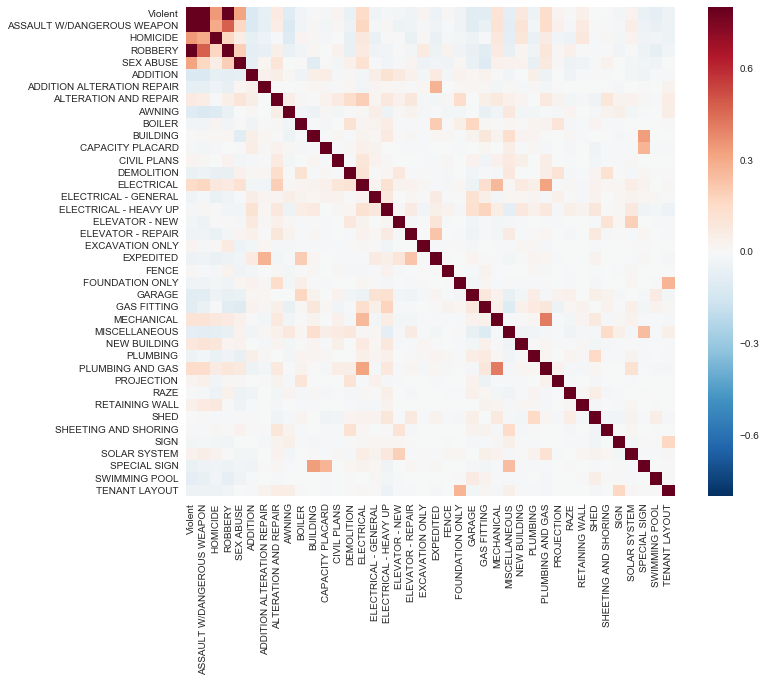

In [63]:
# not very correlated
corrmat = final_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [65]:
from pandas.stats.plm import PanelOLS
from statsmodels.regression.linear_model import OLS 
import statsmodels.api as sm
import statsmodels.formula.api as smf

### All crime modeling

In [66]:
#all crime by certain building permits
all_crime_model = PanelOLS(y=all_crime_with_permits['crime_committed'],x=all_crime_with_permits[['MISCELLANEOUS','GAS_FITTING']], time_effects=True)



/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: FutureWarning: The pandas.stats.plm module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/mixed_linear.html
  if self.run_code(code, result):


In [68]:
all_crime_model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MISCELLANEOUS> + <GAS_FITTING>

Number of Observations:         840
Number of Degrees of Freedom:   107

R-squared:         0.1941
Adj R-squared:     0.0775

Rmse:             29.7396

F-stat (2, 733):     1.6650, p-value:     0.1899

Degrees of Freedom: model 106, resid 733

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
 MISCELLANEOUS     0.1019     0.0131       7.78     0.0000     0.0762     0.1276
   GAS_FITTING    -2.9295     0.3195      -9.17     0.0000    -3.5557    -2.3034
---------------------------------End of Summary---------------------------------

In [73]:
md_all_crime = smf.mixedlm("crime_committed ~ MISCELLANEOUS + GAS_FITTING", all_crime_with_permits, groups=all_crime_with_permits.index)
mdf_all_crime = md_all_crime.fit()
print(mdf_all_crime.summary())

              Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  crime_committed
No. Observations:  840      Method:              REML           
No. Groups:        840      Scale:               451.0142       
Min. group size:   1        Likelihood:          -4051.2664     
Max. group size:   1        Converged:           Yes            
Mean group size:   1.0                                          
----------------------------------------------------------------
               Coef.     Std.Err.       z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept      92.556          1.462  63.317 0.000 89.691 95.421
MISCELLANEOUS   0.096          0.012   7.792 0.000  0.072  0.120
GAS_FITTING    -2.880          0.273 -10.538 0.000 -3.416 -2.345
groups RE     451.014 2850394710.995                            



In [74]:
sd = mdf_all_crime.predict()

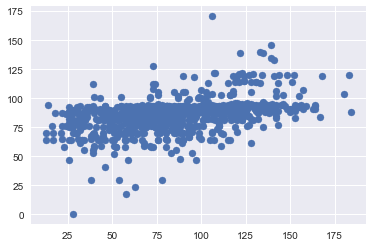

In [76]:
plt.scatter(all_crime_with_permits['crime_committed'], sd)

### Violent crime modeling

In [69]:
model = PanelOLS(y=final_data['Violent'],x=final_data[['ELECTRICAL','MECHANICAL','PLUMBING AND GAS', "NEW BUILDING"]], time_effects=True)

In [70]:
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ELECTRICAL> + <MECHANICAL> + <PLUMBING AND GAS> + <NEW BUILDING>

Number of Observations:         824
Number of Degrees of Freedom:   109

R-squared:         0.0575
Adj R-squared:    -0.0849

Rmse:              7.9144

F-stat (4, 715):     0.4039, p-value:     0.8059

Degrees of Freedom: model 108, resid 715

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
    ELECTRICAL     0.0031     0.0009       3.26     0.0012     0.0012     0.0049
    MECHANICAL     0.0012     0.0011       1.03     0.3016    -0.0011     0.0034
PLUMBING AND GAS     0.0017     0.0006       2.90     0.0039     0.0006     0.0029
  NEW BUILDING     0.0023     0.0008       2.67     0.0077     0.0006     0.0039
-----------------------

In [434]:
final_data.columns

Index([u'Violent', u'ASSAULT W/DANGEROUS WEAPON', u'HOMICIDE', u'ROBBERY',
       u'SEX ABUSE', u'ADDITION', u'ADDITION ALTERATION REPAIR',
       u'ALTERATION AND REPAIR', u'AWNING', u'BOILER', u'BUILDING',
       u'CAPACITY PLACARD', u'CIVIL PLANS', u'DEMOLITION', u'ELECTRICAL',
       u'ELECTRICAL - GENERAL', u'ELECTRICAL - HEAVY UP', u'ELEVATOR - NEW',
       u'ELEVATOR - REPAIR', u'EXCAVATION ONLY', u'EXPEDITED', u'FENCE',
       u'FOUNDATION ONLY', u'GARAGE', u'GAS FITTING', u'MECHANICAL',
       u'MISCELLANEOUS', u'NEW BUILDING', u'PLUMBING', u'PLUMBING AND GAS',
       u'PROJECTION', u'RAZE', u'RETAINING WALL', u'SHED',
       u'SHEETING AND SHORING', u'SIGN', u'SOLAR SYSTEM', u'SPECIAL SIGN',
       u'SWIMMING POOL', u'TENANT LAYOUT'],
      dtype='object')

In [80]:
final_data.rename(columns={"PLUMBING AND GAS": "PLUMBING_AND_GAS", "NEW BUILDING":"NEW_BUILDING"}, inplace = True)

In [81]:
md = smf.mixedlm("Violent ~ ELECTRICAL+ MECHANICAL + PLUMBING_AND_GAS + NEW_BUILDING", final_data, groups=final_data.index)
mdf = md.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  Violent   
No. Observations:   824      Method:              REML      
No. Groups:         824      Scale:               31.2650   
Min. group size:    1        Likelihood:          -2895.9503
Max. group size:    1        Converged:           Yes       
Mean group size:    1.0                                     
------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept        13.793    0.078 176.423 0.000 13.639 13.946
ELECTRICAL        0.002    0.001   3.276 0.001  0.001  0.004
MECHANICAL        0.001    0.001   1.160 0.246 -0.001  0.003
PLUMBING_AND_GAS  0.001    0.001   2.485 0.013  0.000  0.002
NEW_BUILDING      0.002    0.001   2.141 0.032  0.000  0.003
groups RE        31.265                                     



/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2039: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


In [82]:
a = mdf.predict()

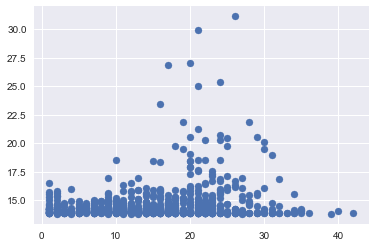

In [83]:
plt.scatter(final_data['Violent'], a)

## Final data correlation

In [306]:
final_data.head(1)

,,Violent,ASSAULT W/DANGEROUS WEAPON,HOMICIDE,ROBBERY,SEX ABUSE,ADDITION,ADDITION ALTERATION REPAIR,ALTERATION AND REPAIR,AWNING,BOILER,BUILDING,CAPACITY PLACARD,CIVIL PLANS,DEMOLITION,ELECTRICAL,ELECTRICAL - GENERAL,ELECTRICAL - HEAVY UP,ELEVATOR - NEW,ELEVATOR - REPAIR,EXCAVATION ONLY,EXPEDITED,FENCE,FOUNDATION ONLY,GARAGE,GAS FITTING,MECHANICAL,MISCELLANEOUS,NEW BUILDING,PLUMBING,PLUMBING AND GAS,PROJECTION,RAZE,RETAINING WALL,SHED,SHEETING AND SHORING,SIGN,SOLAR SYSTEM,SPECIAL SIGN,SWIMMING POOL,TENANT LAYOUT,building_permits,ADDITION,ADDITION ALTERATION REPAIR,ALTERATION AND REPAIR,AWNING,BOILER,BUILDING,CAPACITY PLACARD,CIVIL PLANS,DEMOLITION,ELECTRICAL,ELECTRICAL - GENERAL,ELECTRICAL - HEAVY UP,ELEVATOR - NEW,ELEVATOR - REPAIR,EXCAVATION ONLY,EXPEDITED,FENCE,FOUNDATION ONLY,GARAGE,GAS FITTING,MECHANICAL,MISCELLANEOUS,NEW BUILDING,PLUMBING,PLUMBING AND GAS,PROJECTION,RAZE,RETAINING WALL,SHED,SHEETING AND SHORING,SIGN,SOLAR SYSTEM,SPECIAL SIGN,SWIMMING POOL,TENANT LAYOUT
,WARD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-04,1.0,9,1,0,7,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
co_data = final_data[['Violent','building_permits']]

In [310]:
#just getting the correlation with those variables so there's less to look at 
cor = co_data.corr()
#turning it into a list so it's easier to look at
t = cor.unstack()
st = t.sort_values(kind="quicksort")
print st[:]

Violent           building_permits    0.185154
building_permits  Violent             0.185154
Violent           Violent             1.000000
building_permits  building_permits    1.000000
dtype: float64


In [85]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

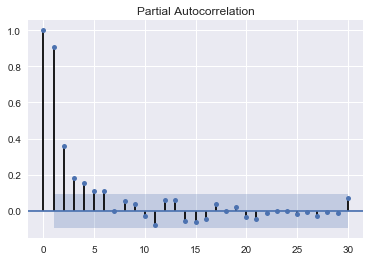

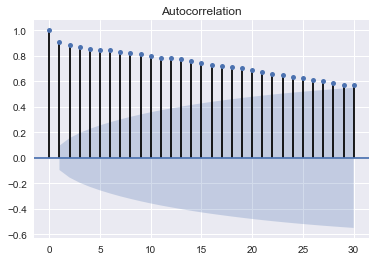

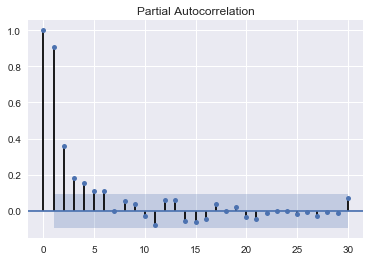

In [136]:

# # 1 Month Autocorr and Partial Autocorr
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(final_data['Violent'], lags =30)
# plot_pacf(final_data['Violent'], lags = 30)

In [261]:
# def test_stationarity(timeseries):

#     #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)

#     #Plot rolling statistics:
#     fig = plt.figure(figsize=(12, 8))
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show()
    
#     #Perform Dickey-Fuller test:
#     print 'Results of Dickey-Fuller Test:'
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print dfoutput 

/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


AttributeError: 'tuple' object has no attribute 'toordinal'

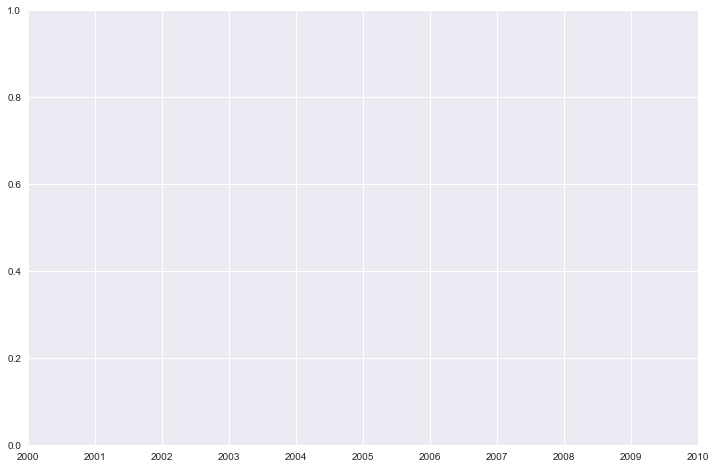

In [323]:
# test_stationarity(df)

In [321]:
#df = pd.DataFrame(df.set_index(df.index).stack())
# df.columns = ['y']
# df['x'] = np.random.random(size=len(df.index))
# df.info()

In [86]:

final_data.rename(columns={"SEX ABUSE": "sex_abuse","ASSAULT W/DANGEROUS WEAPON": "assault_w_weapon", "HOMICIDE": "homicide", "ROBBERY": "robbery"}, inplace = True)




In [88]:
final_data.head()

Violent  assault_w_weapon  homicide  robbery  sex_abuse  \
           WARD                                                            
2015-01-04 1.0         9                 1         0        7          1   
           2.0         4                 1         0        2          1   
           3.0         2                 1         0        0          1   
           4.0        11                 3         0        7          1   
           5.0        13                 6         0        7          0   

                 ADDITION  ADDITION ALTERATION REPAIR  ALTERATION AND REPAIR  \
           WARD                                                                
2015-01-04 1.0        0.0                         0.0                    1.0   
           2.0        0.0                         0.0                    6.0   
           3.0        0.0                         0.0                    1.0   
           4.0        0.0                         0.0                    3.0   
           5.0        0.0                         1.0                    4.0   

                 AWNING  BOILER  BUILDING  CAPACITY PLACARD  CIVIL PLANS  \
           WARD                                                            
2015-01-04 1.0      0.0     0.0       0.0               0.0          0.0   
           2.0      0.0     0.0       0.0               0.0          0.0   
           3.0      0.0     0.0       0.0               0.0          0.0   
           4.0      0.0     0.0       1.0               0.0          0.0   
           5.0      0.0     0.0       2.0               0.0          0.0   

                 DEMOLITION  ELECTRICAL  ELECTRICAL - GENERAL  \
           WARD                                                 
2015-01-04 1.0          0.0         0.0                   0.0   
           2.0          1.0         4.0                   0.0   
           3.0          0.0         3.0                   0.0   
           4.0          0.0         3.0                   0.0   
           5.0          0.0         1.0                   0.0   

                 ELECTRICAL - HEAVY UP  ELEVATOR - NEW  ELEVATOR - REPAIR  \
           WARD                                                             
2015-01-04 1.0                     0.0             0.0                0.0   
           2.0                     0.0             0.0                0.0   
           3.0                     0.0             0.0                0.0   
           4.0                     0.0             0.0                0.0   
           5.0                     0.0             0.0                0.0   

                 EXCAVATION ONLY  EXPEDITED  FENCE  FOUNDATION ONLY  GARAGE  \
           WARD                                                               
2015-01-04 1.0               0.0        0.0    0.0              0.0     0.0   
           2.0               0.0        0.0    0.0              0.0     0.0   
           3.0               0.0        1.0    0.0              0.0     0.0   
           4.0               0.0        3.0    0.0              0.0     0.0   
           5.0               0.0        1.0    0.0              0.0     0.0   

                 GAS FITTING  MECHANICAL  MISCELLANEOUS  NEW_BUILDING  \
           WARD                                                         
2015-01-04 1.0           0.0         1.0            0.0           0.0   
           2.0           0.0         1.0            1.0           0.0   
           3.0           0.0         2.0            0.0           0.0   
           4.0           4.0         0.0            1.0           0.0   
           5.0           0.0         0.0            1.0           0.0   

                 PLUMBING  PLUMBING_AND_GAS  PROJECTION  RAZE  RETAINING WALL  \
           WARD                                                                 
2015-01-04 1.0        0.0               0.0         0.0   0.0             0.0   
           2.0        0.0               3.0         0.0   0.0             0.0   
    

In [229]:
#final_data_less = final_data[['Violent','building_permits']]

In [230]:
#final_data_less['Violent'] = final_data_less.Violent.astype("float")

/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [231]:
#final_data_less['building_permits'] = final_data_less.building_permits.astype('float')

/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [232]:
#final_data_less.head()

Violent building_permits
                    sum              sum
           WARD                         
2015-01-04 1.0      9.0              2.0
           2.0      4.0             16.0
           3.0      2.0             11.0
           4.0     11.0             18.0
           5.0     13.0             17.0

In [233]:
#type(final_data_less)

pandas.core.frame.DataFrame

In [234]:
#final_data_less.isnull().sum()

Violent           sum    0
building_permits  sum    0
dtype: int64

# Timeseries analysis

In [89]:
df.head()

,WARD,Violent,ASSAULT W/DANGEROUS WEAPON,HOMICIDE,ROBBERY,SEX ABUSE
2008-01-01,4,1,0,0,1,0
2008-01-01,4,1,1,0,0,0
2008-01-01,2,1,0,0,1,0
2008-01-01,2,1,1,0,0,0
2008-01-01,2,1,1,0,0,0


In [90]:
ward_1 = df[df['WARD']==1]
ward_2 = df[df['WARD']==2]
ward_3 = df[df['WARD']==3]
ward_4 = df[df['WARD']==4]
ward_5 = df[df['WARD']==5]
ward_6 = df[df['WARD']==6]
ward_7 = df[df['WARD']==7]
ward_8 = df[df['WARD']==8]

In [91]:
ward_1 = ward_1.groupby([pd.TimeGrouper('W')]).sum()
ward_2 = ward_2.groupby([pd.TimeGrouper('W')]).sum()
ward_3 = ward_3.groupby([pd.TimeGrouper('W')]).sum()
ward_4 = ward_4.groupby([pd.TimeGrouper('W')]).sum()
ward_5 = ward_5.groupby([pd.TimeGrouper('W')]).sum()
ward_6 = ward_6.groupby([pd.TimeGrouper('W')]).sum()
ward_7 = ward_7.groupby([pd.TimeGrouper('W')]).sum()
ward_8 = ward_8.groupby([pd.TimeGrouper('W')]).sum()

In [571]:
# def fun(dflist):
#     for df in dflist:
#         df = df.groupby([pd.TimeGrouper('W')]).sum()
#         return df

In [567]:
#x = [ward_1,ward_2,ward_3,ward_4,ward_5,ward_6,ward_7,ward_8]

In [93]:
ward_1.drop('WARD', axis=1, inplace=True)
ward_2.drop('WARD', axis=1, inplace=True)
ward_3.drop('WARD', axis=1, inplace=True)
ward_4.drop('WARD', axis=1, inplace=True)
ward_5.drop('WARD', axis=1, inplace=True)
ward_6.drop('WARD', axis=1, inplace=True)
ward_7.drop('WARD', axis=1, inplace=True)
ward_8.drop('WARD', axis=1, inplace=True)

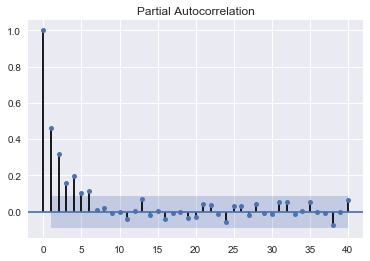

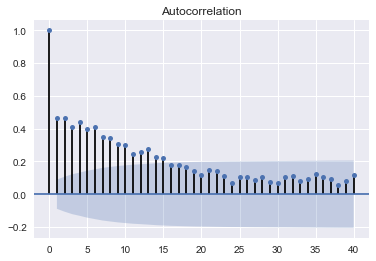

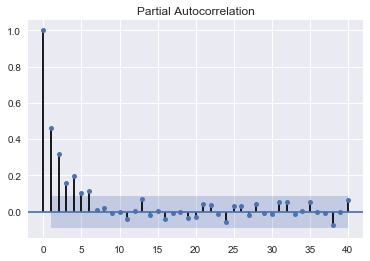

In [94]:
plot_acf(ward_1['Violent'], lags =40)
plot_pacf(ward_1['Violent'], lags = 40)

In [95]:
ward_4.shape

(485, 5)

In [590]:
484/4.0


121.0

In [591]:
484-121

363

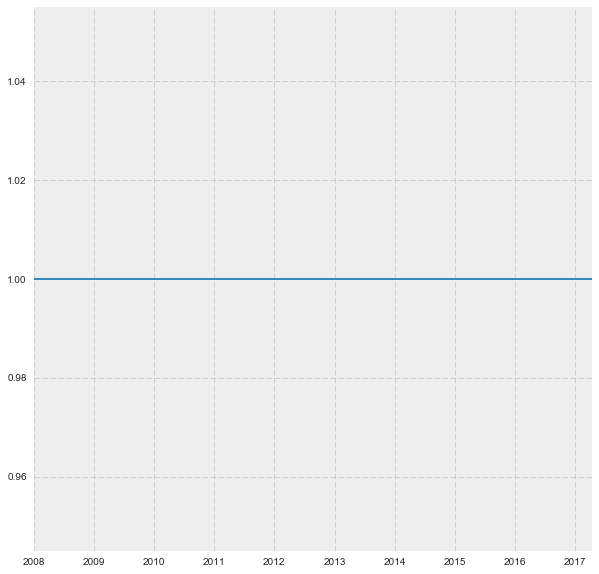

In [133]:
#ward_8.index.value_counts().sort_index().plot()

In [272]:
train = ward_1.head(363)
test = ward_1.tail(121)

In [273]:
test.head()

,Violent,ASSAULT W/DANGEROUS WEAPON,HOMICIDE,ROBBERY,SEX ABUSE
2014-12-21,6,2,0,4,0
2014-12-28,12,3,1,8,0
2015-01-04,9,1,0,7,1
2015-01-11,11,3,1,7,0
2015-01-18,12,3,0,7,2


In [97]:
ward_1_values = ward_1['Violent'].values.astype('float32')

In [98]:
from statsmodels.tsa.arima_model import AR, ARMA, ARIMA

train_values = train['Violent'].values.astype('float32')
train_dates = train.index
AR1 = AR(train_values, train_dates).fit()

In [274]:
test_values = test['Violent'].values
test_dates = test.index


# The AR Predict takes a start and and end date as values and not a list.
start = '2014-12-21'
end = '2017-04-09'


AR1_pred = AR1.predict(start=start, end = end)

In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_values, AR1_pred)

6.1650441866404364

In [101]:
AR1_residuals = test_values - AR1_pred

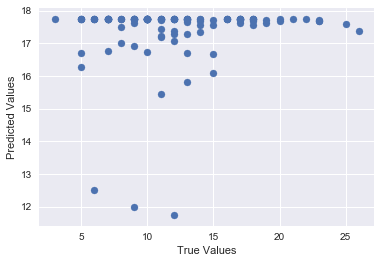

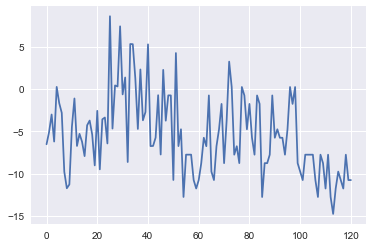

In [103]:
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.scatter(test_values, AR1_pred)
plt.show()

plt.plot(AR1_residuals)
plt.show()

In [104]:
AR2 = ARMA(endog = train_values, dates = train_dates, order = (2,4)).fit()

# Same start and end we outlined earlier.
AR2_pred = AR2.predict(start=start, end = end)

mean_absolute_error(test_values, AR2_pred)

6.219655444261031

In [105]:
AR2_residuals = test_values - AR2_pred

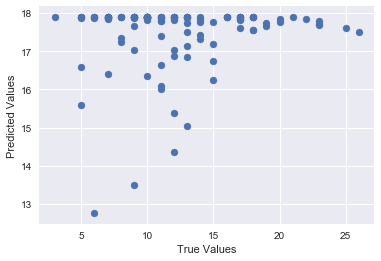

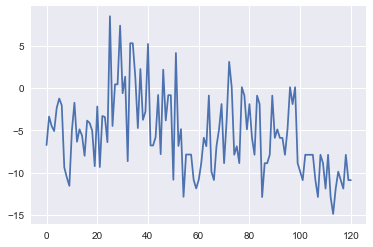

In [106]:
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.scatter(test_values, AR2_pred)
plt.show()

plt.plot(AR2_residuals)
plt.show()

In [107]:
AR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:                     ARMA(2, 4)   Log Likelihood               -1125.351
Method:                       css-mle   S.D. of innovations              5.368
Date:                Tue, 23 May 2017   AIC                           2266.702
Time:                        17:41:58   BIC                           2297.857
Sample:                    01-06-2008   HQIC                          2279.086
                         - 12-14-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9017      1.040     17.206      0.000      15.862      19.941
ar.L1.y        0.0745      0.135      0.551      0.582      -0.191       0.340
ar.L2.y        0.7720      0.127      6.095      0.000       0.524       1.020
ma.L1.y        0.1076      0.145      0.743      0.458      -0.176       0.391
ma.L2.y       -0.5912      0.117     -5.070      0.000      -0.820      -0.363
ma.L3.y       -0.0017      0.057     -0.031      0.976      -0.113       0.110
ma.L4.y        0.0658      0.058      1.126      0.261      -0.049       0.180
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0909           +0.0000j            1.0909            0.0000
AR.2           -1.1875           +0.0000j            1.1875            0.5000
MA.1            1.7247           +0.0000j            1.7247            0.0000
MA.2            2.3870           +0.0000j            2.3870            0.0000
MA.3           -1.3501           +0.0000j            1.3501            0.5000
MA.4           -2.7352           +0.0000j            2.7352            0.5000
-----------------------------------------------------------------------------
"""

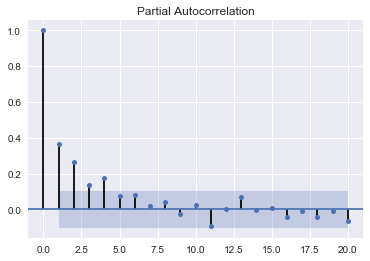

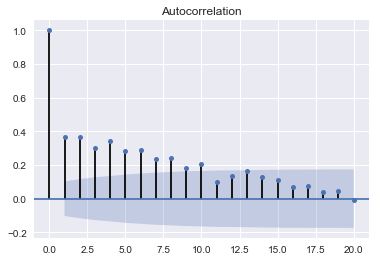

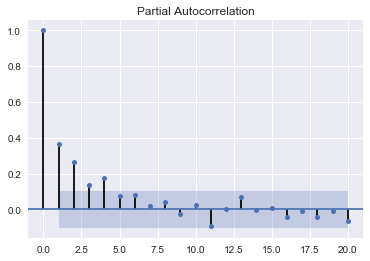

In [108]:
plot_acf(train['Violent'], lags =20)

plot_pacf(train['Violent'], lags = 20)

In [110]:
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings


In [112]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [117]:
evaluate_arima_model(ward_1_values, (6,1,1))

/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/brookeneubauer/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning

23.159672918552534

In [727]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(ward_1_values, p_values, d_values, q_values)


ARIMA(0, 0, 0) MSE=54.565
ARIMA(0, 0, 1) MSE=44.352
ARIMA(0, 0, 2) MSE=36.646
ARIMA(0, 1, 0) MSE=42.385
ARIMA(0, 1, 1) MSE=22.992
ARIMA(0, 1, 2) MSE=23.296
ARIMA(0, 2, 0) MSE=137.926
ARIMA(0, 2, 1) MSE=42.586
ARIMA(1, 0, 0) MSE=36.479
ARIMA(1, 0, 1) MSE=23.875
ARIMA(1, 0, 2) MSE=23.921
ARIMA(1, 1, 0) MSE=26.787
ARIMA(1, 1, 1) MSE=23.298
ARIMA(1, 1, 2) MSE=22.893
ARIMA(1, 2, 0) MSE=58.695
ARIMA(2, 0, 0) MSE=28.451
ARIMA(2, 0, 1) MSE=23.912
ARIMA(2, 1, 0) MSE=25.725
ARIMA(2, 1, 1) MSE=23.326
ARIMA(2, 2, 0) MSE=46.260
ARIMA(4, 0, 0) MSE=25.513
ARIMA(4, 0, 1) MSE=23.851
ARIMA(4, 1, 0) MSE=23.201
ARIMA(4, 1, 1) MSE=23.219
ARIMA(4, 2, 0) MSE=35.699
ARIMA(6, 0, 0) MSE=24.656
ARIMA(6, 1, 0) MSE=23.657
ARIMA(6, 1, 1) MSE=23.160
ARIMA(6, 2, 0) MSE=30.506
ARIMA(6, 2, 1) MSE=23.865
ARIMA(8, 0, 0) MSE=24.976
ARIMA(8, 1, 0) MSE=24.259


In [238]:
ward_1_less = ward_1.drop(['ASSAULT W/DANGEROUS WEAPON', 'HOMICIDE', 'ROBBERY', 'SEX ABUSE'], axis=1)
ward_2_less = ward_2.drop(['ASSAULT W/DANGEROUS WEAPON', 'HOMICIDE', 'ROBBERY', 'SEX ABUSE'], axis=1)
ward_3_less = ward_3.drop(['ASSAULT W/DANGEROUS WEAPON', 'HOMICIDE', 'ROBBERY', 'SEX ABUSE'], axis=1)
ward_4_less = ward_4.drop(['ASSAULT W/DANGEROUS WEAPON', 'HOMICIDE', 'ROBBERY', 'SEX ABUSE'], axis=1)
ward_5_less = ward_5.drop(['ASSAULT W/DANGEROUS WEAPON', 'HOMICIDE', 'ROBBERY', 'SEX ABUSE'], axis=1)
ward_6_less = ward_6.drop(['ASSAULT W/DANGEROUS WEAPON', 'HOMICIDE', 'ROBBERY', 'SEX ABUSE'], axis=1)
ward_7_less = ward_7.drop(['ASSAULT W/DANGEROUS WEAPON', 'HOMICIDE', 'ROBBERY', 'SEX ABUSE'], axis=1)
ward_8_less = ward_8.drop(['ASSAULT W/DANGEROUS WEAPON', 'HOMICIDE', 'ROBBERY', 'SEX ABUSE'], axis=1)


In [140]:
import statsmodels.api as sm

(1,0,1)(0,0,0,12) 2975

In [270]:
data = ward_1_less.stack().values
model = sm.tsa.statespace.SARIMAX(data, order=(4,1,1), seasonal_order=(0,1,0,5))
results = model.fit()
print results.summary()

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  484
Model:             SARIMAX(4, 1, 1)x(0, 1, 0, 5)   Log Likelihood               -1898.603
Date:                           Wed, 24 May 2017   AIC                           3809.205
Time:                                   10:29:54   BIC                           3834.298
Sample:                                        0   HQIC                          3819.065
                                           - 484                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5316      0.055     -9.732      0.000      -0.639      -0.425
ar.L2          0.9298      0.078     11.961

In [281]:
def get_pred(ward):
    train_size = int(len(ward) * 0.66)
	train, test = ward[0:train_size], ward[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
        model = sm.tsa.statespace.SARIMAX(data, order=(1,0,1), seasonal_order=(0,0,0,5))
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
        model = sm.tsa.statespace.SARIMAX(data, order=(1,0,1), seasonal_order=(0,0,0,5))
        results = model.fit()
        residuals = results.resid[5:]
        plt.plot(residuals)
        plot_acf(residuals, lags=30)
        plot_pacf(residuals, lags=30)
    print results.summary()

IndentationError: unexpected indent (<ipython-input-281-7f5c11545049>, line 3)

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  485
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1362.350
Date:                Wed, 24 May 2017   AIC                           2730.699
Time:                        09:48:21   BIC                           2743.252
Sample:                             0   HQIC                          2735.631
                                - 485                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9985      0.002    551.773      0.000       0.995       1.002
ma.L1         -0.8525      0.025    -33.836      0.000      -0.902      -0.803
sigma2        16.0109      0.951     16.836      0.0

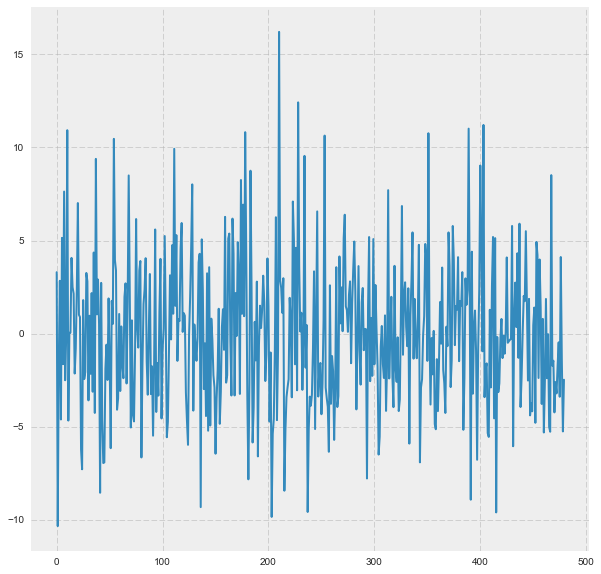

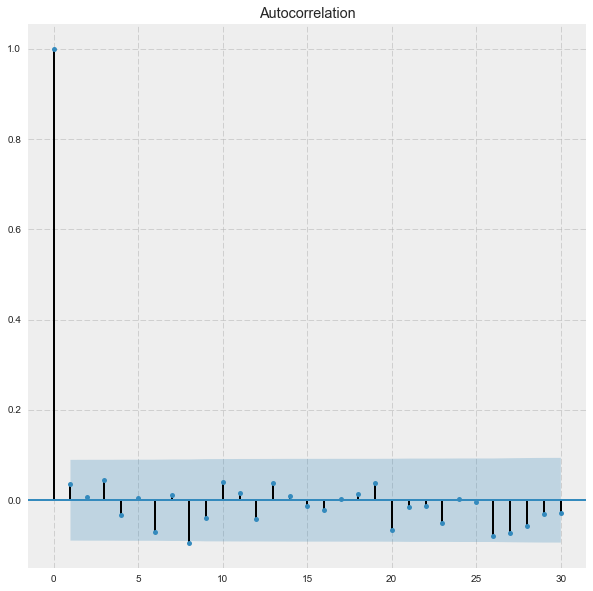

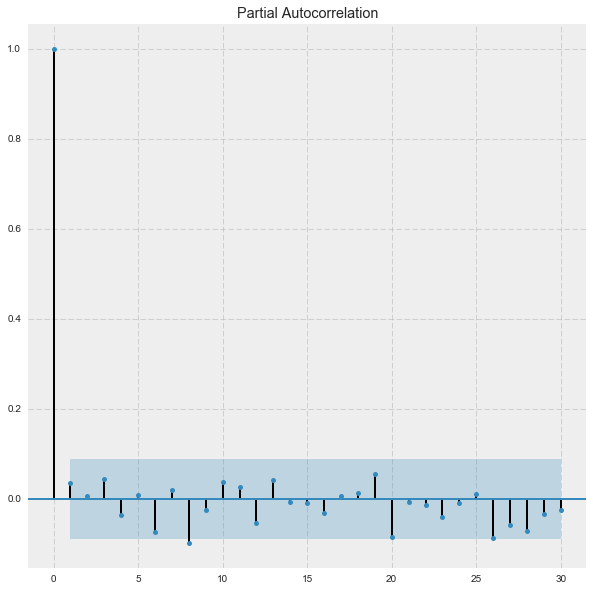

In [242]:
get_pred(ward_2_less)

In [234]:
# data1 = ward_1_less
# model1 = ARIMA(data1, order=(1,1,1))
# results1 = model1.fit()
# print results1.summary()

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

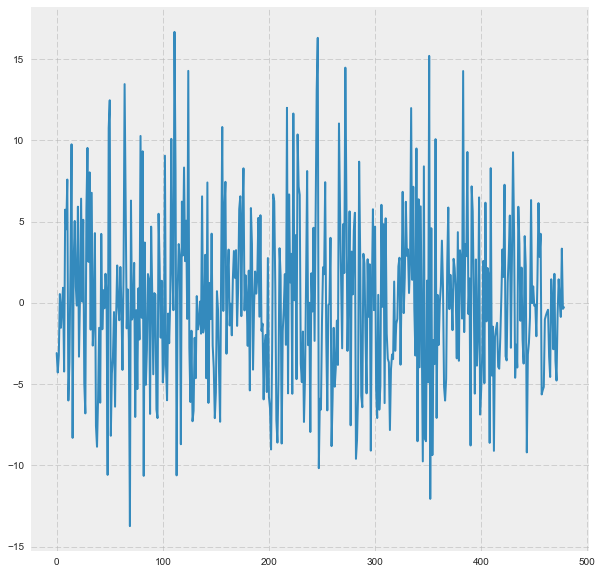

In [196]:
residuals = results.resid[5:]
plt.plot(residuals)

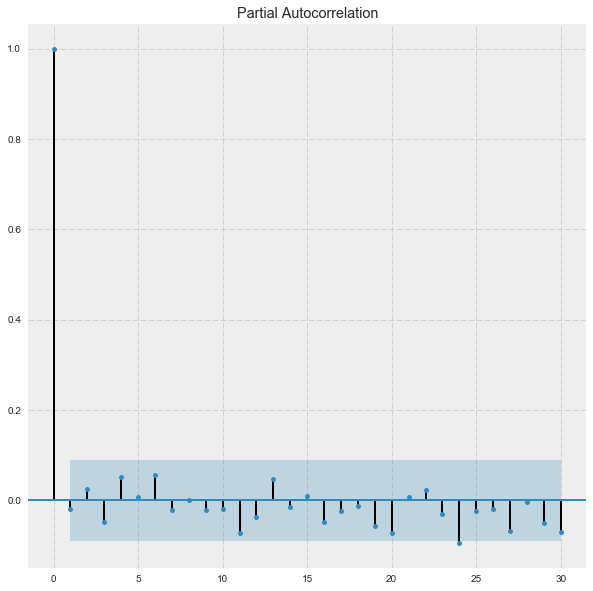

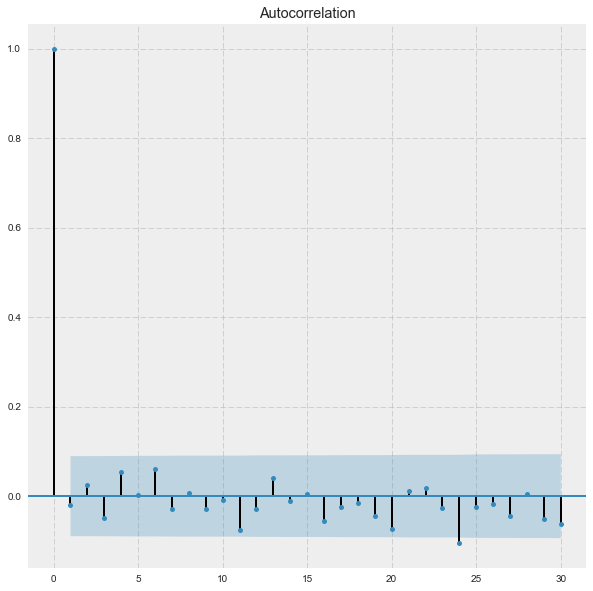

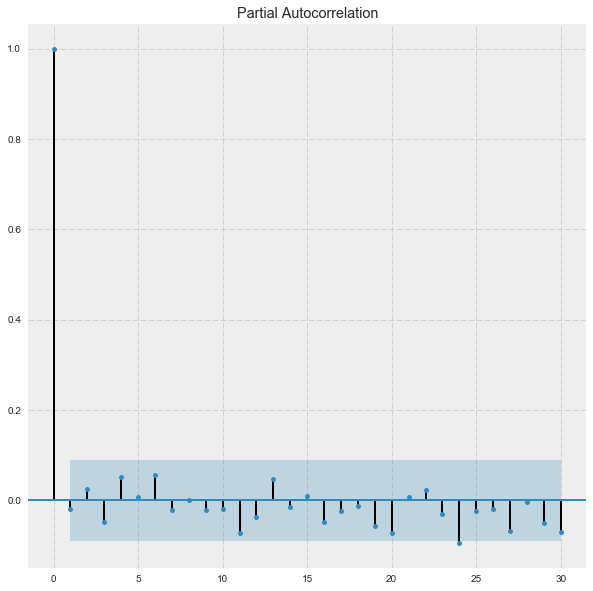

In [197]:
plot_acf(residuals, lags=30)
plot_pacf(residuals, lags=30)


In [263]:
# res = model.fit()
preds = results.forecast(12)
fcast = np.concatenate((data, preds), axis=0)


In [219]:
#results.plot_predict()

AttributeError: 'SARIMAXResults' object has no attribute 'plot_predict'

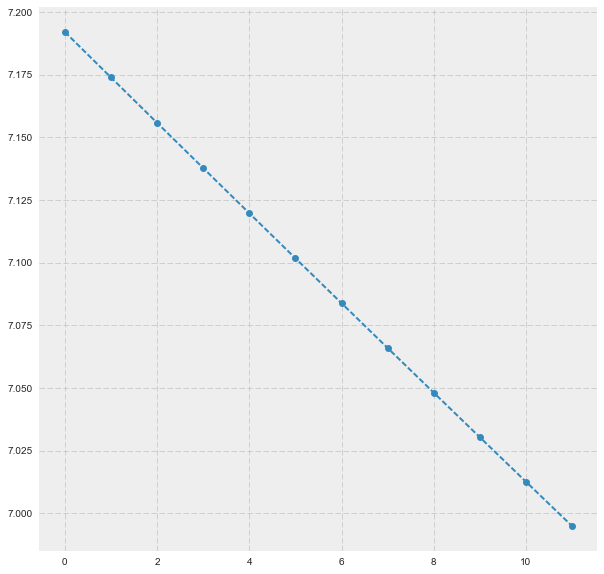

In [264]:
plt.figure();
plt.plot(preds, 'o--');

In [277]:

from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

 

X = ward_1_less.values
size = int(len(X) * 0.66)
train, test = X[0:size].astype('float32'), X[size:len(X)].astype('float32')
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(6,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

predicted=15.253450, expected=5.000000
predicted=11.194371, expected=7.000000
predicted=12.148481, expected=7.000000
predicted=10.929714, expected=6.000000
predicted=9.608549, expected=10.000000
predicted=10.756279, expected=6.000000
predicted=9.254168, expected=7.000000
predicted=9.402372, expected=7.000000
predicted=9.805859, expected=10.000000
predicted=9.787684, expected=11.000000
predicted=11.098968, expected=5.000000
predicted=9.224743, expected=9.000000
predicted=10.304117, expected=15.000000
predicted=11.991471, expected=9.000000
predicted=10.725880, expected=11.000000
predicted=11.917647, expected=16.000000
predicted=13.093806, expected=14.000000
predicted=12.733666, expected=15.000000
predicted=14.385501, expected=13.000000
predicted=13.818365, expected=15.000000
predicted=14.087468, expected=25.000000
predicted=17.525481, expected=17.000000
predicted=16.072370, expected=23.000000
predicted=18.071564, expected=17.000000
predicted=17.954238, expected=14.000000
predicted=15.902

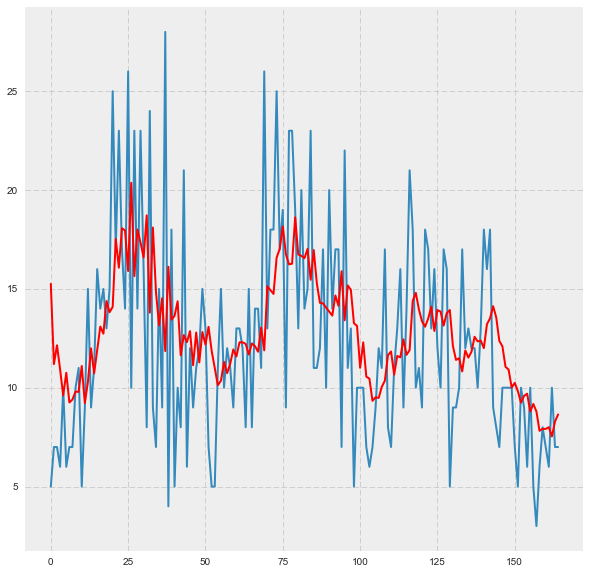

In [278]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()